In [101]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf 
print(tf.__version__)

1.15.2


In [102]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

In [103]:
filepath = '/home/suveli.20/pima_diabetes_1.csv'
col_names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv(filepath,  names=col_names)

In [104]:
print(df.isnull().sum())

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64


In [105]:
print(df.shape)
print(df.dtypes)

(768, 9)
preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object


In [106]:
print(df.describe(include = None))

             preg        plas        pres        skin        test        mass  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

             pedi         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

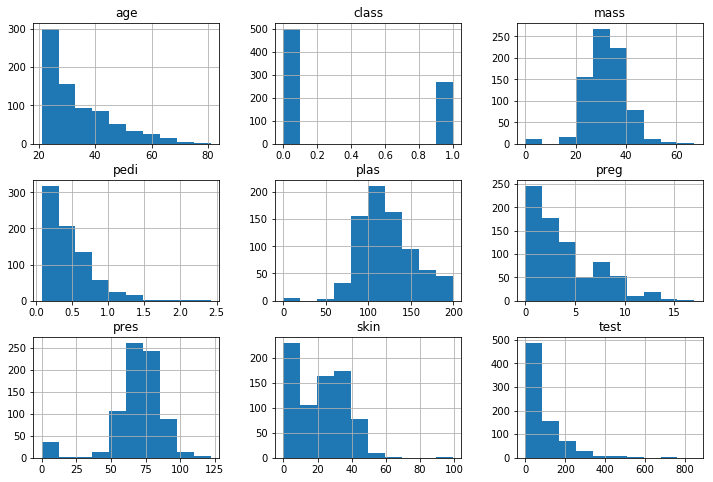

In [107]:
df.hist(figsize=(12,8))
pyplot.show()

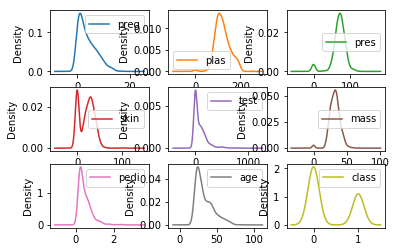

In [108]:
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False, legend=True, fontsize =10)
pyplot.show()

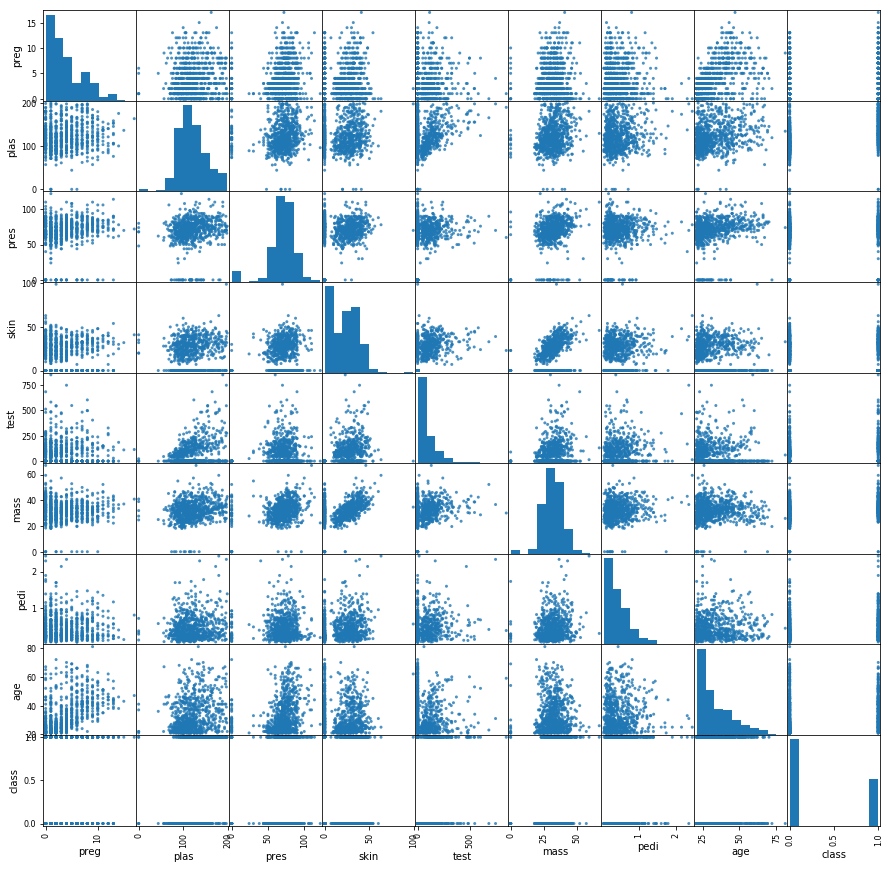

In [109]:
scatter_matrix(df, alpha = 0.8, figsize=(15,15))
pyplot.show()

In [110]:
print(df.head(5))
print(df.groupby('class').size())

   preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1
class
0    500
1    268
dtype: int64


In [139]:
random_seed = 7
np.random.seed(random_seed)

In [140]:
array = df.values
X1 = array[:, 0:8]
Y = array[:, 8]
sc_x = StandardScaler()
X = sc_x.fit_transform(X1)

In [141]:
test_size = 0.33
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_seed)

In [142]:

def baseline_model():
    model = Sequential()
    model.add(Dense(8, input_dim = 8, activation ='relu'))
    model.add(Dense(8, activation ='relu'))
    #model.add(Dense(6, activation ='relu'))
    model.add(Dense(1, activation ='sigmoid'))
    model.compile
    model.compile(loss='binary_crossentropy', optimizer = 'adam',metrics =['accuracy'])
    return model

model=baseline_model()

In [143]:
model.fit(X_train, Y_train, epochs=150, batch_size=10)


Epoch 1/150
514/514 [==============================] - 3s 5ms/step - loss: 0.6488 - accuracy: 0.6537
Epoch 2/150
514/514 [==============================] - 0s 568us/step - loss: 0.6018 - accuracy: 0.6576
Epoch 3/150
514/514 [==============================] - 0s 524us/step - loss: 0.5683 - accuracy: 0.6576
Epoch 4/150
514/514 [==============================] - 0s 512us/step - loss: 0.5464 - accuracy: 0.6595
Epoch 5/150
514/514 [==============================] - 0s 512us/step - loss: 0.5332 - accuracy: 0.6615
Epoch 6/150
514/514 [==============================] - 0s 513us/step - loss: 0.5229 - accuracy: 0.6770
Epoch 7/150
514/514 [==============================] - 0s 511us/step - loss: 0.5160 - accuracy: 0.7179
Epoch 8/150
514/514 [==============================] - 0s 516us/step - loss: 0.5092 - accuracy: 0.7374
Epoch 9/150
514/514 [==============================] - 0s 566us/step - loss: 0.5042 - accuracy: 0.7568
Epoch 10/150
514/514 [==============================] - 0s 560us/step - los

In [144]:
evaluator = KerasClassifier(build_fn=baseline_model,epochs = 150, batch_size=10)

In [145]:
kfold=KFold(n_splits = 10, shuffle=True, random_state = random_seed)

In [146]:
results=cross_val_score(evaluator, X_test, Y_test, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/150
228/228 [==============================] - 2s 11ms/step - loss: 0.7527 - accuracy: 0.4825
Epoch 2/150
228/228 [==============================] - 0s 562us/step - loss: 0.7182 - accuracy: 0.5439
Epoch 3/150
228/228 [==============================] - 0s 643us/step - loss: 0.6956 - accuracy: 0.6053
Epoch 4/150
228/228 [==============================] - 0s 585us/step - loss: 0.6795 - accuracy: 0.6140
Epoch 5/150
228/228 [==============================] - 0s 555us/step - loss: 0.6691 - accuracy: 0.6228
Epoch 6/150
228/228 [==============================] - 0s 544us/step - loss: 0.6583 - accuracy: 0.6447
Epoch 7/150
228/228 [==============================] - 0s 564us/step - loss: 0.6501 - accuracy: 0.6491
Epoch 8/150
228/228 [==============================] - 0s 516us/step - loss: 0.6418 - accuracy: 0.6667
Epoch 9/150
228/228 [==============================] - 0s 568us/step - loss: 0.6342 - accuracy: 0.6798
Epoch 10/150
228/228 [==============================] - 0s 592us/step - lo

In [147]:
#evaluate the model
scores =model.evaluate(X_test, Y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

254/254 [==============================] - 2s 7ms/step

accuracy: 74.41%
